Downloading...
From: https://drive.google.com/uc?id=1FhECEN3K2zCUs4zroAYDMFrNWFLHeSNc
To: /content/aaron_judge.csv
100%|██████████| 1.46M/1.46M [00:00<00:00, 73.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EaOVA-9mRWf2lqZ7I6H5zlWD_n6h2fa8
To: /content/jose_altuve.csv
100%|██████████| 1.15M/1.15M [00:00<00:00, 96.1MB/s]
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8371040723981901


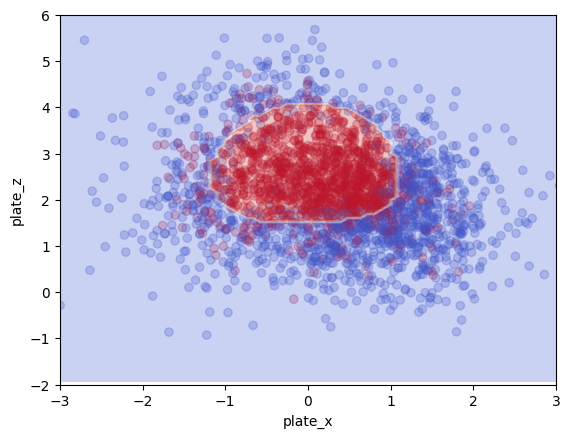

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8236607142857143


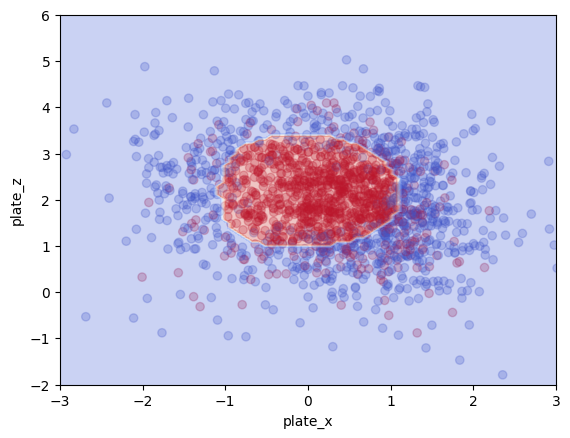

In [10]:
import seaborn
import matplotlib.pyplot as plt
import gdown
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay


# Import Data

file_id = "1FhECEN3K2zCUs4zroAYDMFrNWFLHeSNc"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, "aaron_judge.csv", quiet=False)
aaron_judge = pd.read_csv("aaron_judge.csv")

file_id = "1EaOVA-9mRWf2lqZ7I6H5zlWD_n6h2fa8"
url = f"https://drive.google.com/uc?id={file_id}"
gdown.download(url, "jose_altuve.csv", quiet=False)
jose_altuve = pd.read_csv("jose_altuve.csv")

fig, ax = plt.subplots()

aaron_judge["type"] = aaron_judge["type"].map({"S":1, "B":0})

aaron_judge = aaron_judge.dropna(subset = ["type", "plate_x", "plate_z"])

plt.scatter(x = aaron_judge["plate_x"], y = aaron_judge["plate_z"], c = aaron_judge["type"], cmap = plt.cm.coolwarm, alpha = 0.25)

training_set, validation_set = train_test_split(aaron_judge, random_state = 1)

classifier = SVC(kernel = "rbf", gamma = 0.7, C = 0.7)
classifier.fit(training_set[["plate_x", "plate_z"]], training_set[["type"]])
print(classifier.score(validation_set[["plate_x", "plate_z"]], validation_set[["type"]]))

ax.set_ylim(-2, 6)
ax.set_xlim(-3, 3)

ax.set_ylim(-2, 6)
ax.set_xlim(-3, 3)

DecisionBoundaryDisplay.from_estimator(
    classifier,
    training_set[["plate_x", "plate_z"]],
    ax=ax,
    alpha=0.3,
    cmap=plt.cm.coolwarm,
    response_method="predict"
)

plt.show()

################################################################

fig, ax = plt.subplots()

jose_altuve["type"] = jose_altuve["type"].map({"S":1, "B":0})

jose_altuve = jose_altuve.dropna(subset = ["type", "plate_x", "plate_z"])

plt.scatter(x = jose_altuve["plate_x"], y = jose_altuve["plate_z"], c = jose_altuve["type"], cmap = plt.cm.coolwarm, alpha = 0.25)

training_set, validation_set = train_test_split(jose_altuve, random_state = 1)

classifier = SVC(kernel = "rbf", gamma = 0.7, C = 0.7)
classifier.fit(training_set[["plate_x", "plate_z"]], training_set[["type"]])
print(classifier.score(validation_set[["plate_x", "plate_z"]], validation_set[["type"]]))

ax.set_ylim(-2, 6)
ax.set_xlim(-3, 3)

DecisionBoundaryDisplay.from_estimator(
    classifier,
    training_set[["plate_x", "plate_z"]],
    ax=ax,
    alpha=0.3,
    cmap=plt.cm.coolwarm,
    response_method="predict"
)
plt.show()
